# **Mounting drive**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# **Downloading the Data**

In [ ]:
!gdown 1ojaJLmM6sar58i0WZ9_C5j7gwBc1chLl

Downloading...
From: https://drive.google.com/uc?id=1ojaJLmM6sar58i0WZ9_C5j7gwBc1chLl
To: /content/Movie_Reviews.csv
100% 66.2M/66.2M [00:00<00:00, 237MB/s]


# **Downloading Libraries**

In [ ]:
!pip install tf-models-official # installing tensorflow models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 29.0 MB/s 
     |████████████████████████████████| 1.1 MB 64.6 MB/s 
     |████████████████████████████████| 43 kB 2.4 MB/s 
     |████████████████████████████████| 1.3 MB 64.5 MB/s 
     |████████████████████████████████| 238 kB 60.6 MB/s 
     |████████████████████████████████| 662 kB 73.8 MB/s 
     |████████████████████████████████| 118 kB 74.9 MB/s 
     |████████████████████████████████| 352 kB 83.2 MB/s 
     |████████████████████████████████| 5.8 MB 55.9 MB/s 
     |████████████████████████████████| 588.3 MB 20 kB/s 
     |████████████████████████████████| 6.0 MB 59.5 MB/s 
     |████████████████████████████████| 439 kB 79.9 MB/s 
     |████████████████████████████████| 1.7 MB 67.0 MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16179 sha256=2d7611e378aeeed5096ace26eb2bf58b51c6fd11d780eb8235b28247d8b0be

In [ ]:
!pip install transformers # installing hugging face library

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 18.8 MB/s 
     |████████████████████████████████| 7.6 MB 79.4 MB/s 
     |████████████████████████████████| 182 kB 56.4 MB/s 


In [ ]:
!pip install tensorflow-addons # used in importing Chechpoint and Livelossplot
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -q -U "tensorflow-text==2.9.*"

     |████████████████████████████████| 4.6 MB 32.9 MB/s 
     |█████████████████████████▏      | 402.9 MB 1.2 MB/s eta 0:01:31

In [ ]:
!pip install -U nltk

# **Helper Functions**


## Data Cleaning

In [ ]:
import nltk
import re # Used for cleaning HTML tags
import string # Used for cleaning punctuation
from gensim.parsing.preprocessing import remove_stopwords #used to remove stop words (unlike nltk it considers however as a stopword)
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

#Downloading Word datasets used in lemmatization
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

In [ ]:
def preprocess(data):
   lemmatizer = WordNetLemmatizer()
   for i in data.index :  #Does the preprocess to each element in the dataset seperately
    temptxt= data['review'][i]
    temptxt= temptxt.translate(str.maketrans('', '', string.punctuation)) #Removes punctuations from string

    temptxt= temptxt.lower() #Applies lowercase to the entire review string

    temptxt= remove_stopwords(temptxt) #Removes stopwords from the review string



    word_list = word_tokenize(temptxt) #Transforms review from String to a 1d array where each word is an element to lemmatize seperatly
    clean_words= ' '.join([lemmatizer.lemmatize(w) for w in word_list])

    data['review'][i]= clean_words
   return data

In [ ]:
def Remove_tag(data):
   Cleaner =  re.compile('<.*?>')
   for i in data.index :
       data['review'][i]= re.sub(Cleaner,"", data['review'][i]) #Removes br tags
   return data


## Evaluation Metrics

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score

In [ ]:
def Eval (test_labels, y_pred):
  f1 = f1_score(test_labels, y_pred)
  confusion_mat = confusion_matrix(test_labels, y_pred, labels=[0,1])
  accuracy = accuracy_score(test_labels, y_pred)
  precision = precision_score(test_labels, y_pred)
  recall = recall_score(test_labels, y_pred)
  specificity = confusion_mat[1,1]/ (confusion_mat[1,0] + confusion_mat[1,1])

  print("F1 Score   --> ", round(f1,3))
  print("Accuracy   --> ", round(accuracy,3))
  print("Precision  --> ", round(precision,3))
  print("Specificty --> ", round(specificity,3))
  print("Recall     --> ", round(recall,3))
  print("Confusion Matrix :\n", confusion_mat)

  disp = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = ['negative','positive'])
  fig, ax = plt.subplots(figsize=(4,4))
  disp.plot(ax = ax)
  plt.show()

## Early Stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Stop training early if, after 5 epochs, validation accuracy doesn't increase.
stop_early = EarlyStopping(
    patience=5,
    monitor='val_binary_accuracy',
    restore_best_weights=True, # restore the model back to the best state
)

# **Preprocessing Text Data**

In [ ]:
import pandas as pd # Read csv file
df= pd.read_csv('Movie_Reviews.csv')
df.head()

In [ ]:
Data_nrm = Remove_tag(df) #Removing Break HTML tags in text

##Normal Data




In [ ]:
#This is the normal dataset where it isn't preprocessed

Data_nrm['binary']=Data_nrm['sentiment'].apply(lambda x: 1 if x=='negative' else 0) # Adding a layer of binary numbers to dataset for encoding and decoding
df.head()

In [ ]:
from sklearn.model_selection import train_test_split
#Splitting normal data  into train and test datasets
train_nrm, test_nrm, train_labels_nrm, test_labels_nrm = train_test_split(
    Data_nrm['review'],
    Data_nrm['binary'],
    test_size=0.2
)


##Preprocessed Data




In [ ]:
#Using helper function We preprocess the data to Remove Punctiuations,to change uppercased letters to lower case,remove stop words and Finally lemmatize each word
Data_pre=preprocess(Data_nrm)

In [ ]:
Data_pre['binary']=Data_pre['sentiment'].apply(lambda x: 1 if x=='negative' else 0) # Adding a layer of binary numbers to dataset for encoding and decoding
df.head()

In [ ]:
from sklearn.model_selection import train_test_split

#Splitting preprocessed dataset into train and test datasets

train_pre, test_pre, train_labels_pre, test_labels_pre = train_test_split(
    Data_pre['review'],
    Data_pre['binary'],
    test_size=0.2
)


# **Optimizer**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import Adam, Optimizer
from official.nlp import optimization
import tensorflow_text as text
import tensorflow_hub as hub

In [ ]:
def optimizer(n,lr,data):
 epochs = n
 init_lr = lr
 train_dataset = tf.data.Dataset.from_tensor_slices(data)
 steps_per_epoch = tf.data.experimental.cardinality(train_dataset).numpy()
 num_train_steps = steps_per_epoch * epochs
 num_warmup_steps = int(0.1*num_train_steps)

 op = optimization.create_optimizer(init_lr = init_lr,
                                              num_train_steps = num_train_steps,
                                              num_warmup_steps = num_warmup_steps,
                                              optimizer_type='adamw')
 return op

# **BERT Model**

### **Building Model**


In [ ]:
import tensorflow as tf
import tensorflow_text as text
import tensorflow_hub as hub
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam,Optimizer
from tensorflow.keras.losses import binary_crossentropy

In [ ]:
BERT_preprocess = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',name="preprocessing")
#Getting tokenizer from kerashub that will tokenize our data

BERT_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4',name="encoder",trainable= True)
#Getting BERT model that is already pretrained

In [ ]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = BERT_preprocess(text_input)
outputs = BERT_encoder(preprocessed_text)
# Neural network layers
l = tf.keras.layers.Dropout(0.5, name="Dropout")(outputs['pooled_output'])
for i in [512,256,128,64]:
    l = tf.keras.layers.Dense(i, activation='sigmoid', name="Dense_Layer_" + str(i))(l)
l = tf.keras.layers.Dense(1,activation='sigmoid',name="output")(l)
# Use inputs and outputs to construct a final model
BERT_model = tf.keras.Model(inputs=text_input, outputs = l)

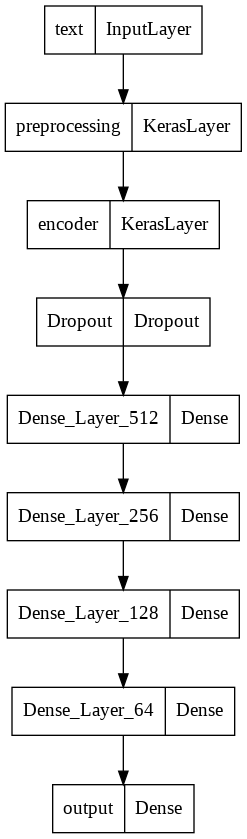

In [ ]:
tf.keras.utils.plot_model(BERT_model)

## With Preprocessing

### **Training**

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from livelossplot import PlotLossesKeras

save_weights = ModelCheckpoint(   # Saving Weights where validation accuracy is the best
    filepath='/content/drive/MyDrive/Text_checkpoints/Bert_pre/checkpoint',
    monitor='val_binary_accuracy',
    save_best_only=True,
    save_weights_only=True,
)

In [ ]:
epochs = 5
lr = 3e-4
BERT_model.compile(optimizer=optimizer(epochs,lr,train_pre),
                         loss="binary_crossentropy",
                          metrics="binary_accuracy")

In [ ]:
tf.autograph.experimental.do_not_convert(
    func=None
)
BERT_model.fit(x=train_pre,
          y=train_labels_pre,
          validation_split = 0.125 ,
          batch_size =32,
          epochs=epochs,
           callbacks =[stop_early,PlotLossesKeras(),save_weights])

Epoch 1/5
 227/1094 [=====>........................] - ETA: 13:16 - loss: 0.6931 - binary_accuracy: 0.5026

###Testing

In [ ]:
BERT_model.load_weights('/content/drive/MyDrive/Text_checkpoints/Bert_pre/checkpoint')

In [ ]:
BERT_model.evaluate(test_pre,test_labels_pre)

In [ ]:
prediction = BERT_model.predict(test_pre)

### Evaluation Metrics

In [ ]:
y_preds = prediction.flatten()
y_preds = np.where(y_preds > 0.5, 1, 0)

In [ ]:
Eval(test_labels_pre, y_preds)

##Without Preprocessing


### **Training**

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from livelossplot import PlotLossesKeras

save_weights = ModelCheckpoint(
    filepath='/content/drive/MyDrive/Text_checkpoints/Bert_nrm/checkpoint',
    monitor='val_binary_accuracy',
    save_best_only=True,
    save_weights_only=True,
)

In [ ]:
epochs = 10
lr = 3e-4
BERT_model.compile(optimizer=optimizer(epochs,lr,train_nrm),
                         loss="binary_crossentropy",
                          metrics="binary_accuracy")

In [ ]:
tf.autograph.experimental.do_not_convert(
    func=None
)
BERT_model.fit(x=train_nrm,
          y=train_labels_nrm,
          validation_split = 0.125 ,
          batch_size =32,
          epochs=epochs,
          callbacks =[stop_early,PlotLossesKeras(),save_weights])

###Testing

In [ ]:
BERT_model.load_weights('/content/drive/MyDrive/Text_checkpoints/Bert_nrm/checkpoint')

In [ ]:
BERT_model.evaluate(test_nrm,test_labels_nrm)

In [ ]:
prediction = BERT_model.predict(test_nrm)

### Evaluation Metrics

In [ ]:
y_preds = prediction.flatten()
y_preds = np.where(y_preds > 0.5, 1, 0)

In [ ]:
Eval(test_labels_nrm, y_preds)

# **ROBERTA Model**

### **Building Model**

In [ ]:
import tensorflow as tf
import tensorflow_text as text
import tensorflow_hub as hub
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam,Optimizer
from tensorflow.keras.losses import binary_crossentropy
from official.nlp import optimization  # to create AdamW optimizer
import tensorflow as tf
from transformers import RobertaTokenizer, TFRobertaModel
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout,Dense



In [ ]:
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
def tokenize(data):
    return dict(                    # Convert the output to a dictionary to use it in model.fit().
        tokenizer(
            list(data),             # The tokenizer accepts a string or a list of string.
            padding="max_length",           # Apply padding and truncation so that all text,
            truncation=True,        # short or long, have the same length.
            return_tensors='tf',   # Return tensorflow tensors instead of pytorch.
        )
    )

In [ ]:
# ROBERTA layers
input_ids = tf.keras.layers.Input(shape=(512,), dtype= "int32", name = "input_ids")
input_masks = tf.keras.layers.Input(shape=(512,), dtype = "int32",name = "attention_mask")
inputs = [input_ids,input_masks]

output= TFRobertaModel.from_pretrained("roberta-base")(inputs)
output = output.pooler_output

for i in [512,256,128,64]:
   output = tf.keras.layers.Dense(i, activation='relu', name="Dense_Layer_" + str(i))(output)

output = Dropout(0.3)(output)
output = Dense(1, activation="sigmoid")(output)
ROBERTA_model = tf.keras.Model(inputs = inputs, outputs = output)



Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


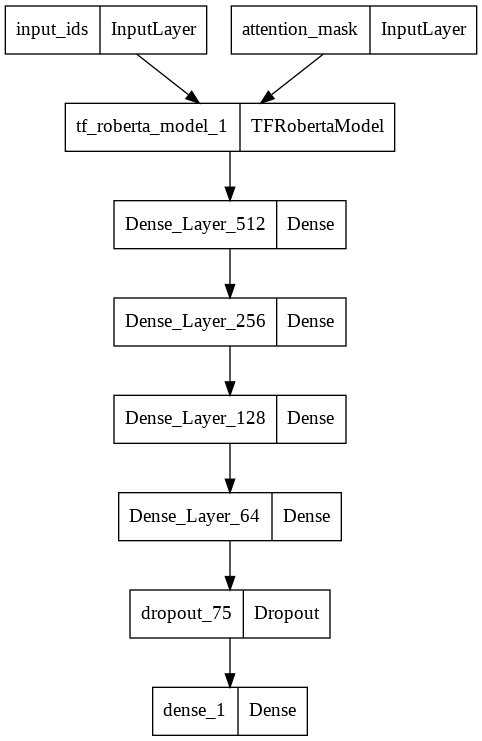

In [ ]:
tf.keras.utils.plot_model(ROBERTA_model)

## With Preprocessing



### **Training**

In [ ]:
train_pre_tok = tokenize(train_pre)
test_pre_tok = tokenize(test_pre)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from livelossplot import PlotLossesKeras

tf.autograph.experimental.do_not_convert(
    func=None
)
save_weights = ModelCheckpoint(
    filepath='/content/drive/MyDrive/Text_checkpoints/Robert_pre/checkpoint',
    monitor='val_binary_accuracy',
    save_best_only=True,
    save_weights_only=True,
)

In [ ]:
epochs = 3
lr = 1e-5
ROBERTA_model.compile(optimizer=optimizer(epochs,lr,train_pre),
                         loss="binary_crossentropy",
                          metrics="binary_accuracy")

In [ ]:
tf.autograph.experimental.do_not_convert(
    func=None
)
ROBERTA_model.fit(x=train_pre_tok,
          y=train_labels_pre,
          validation_split = 0.125 ,
          batch_size =8,
          epochs=epochs,
           callbacks =[stop_early,PlotLossesKeras(),save_weights])

### **Testing**

In [ ]:
#ROBERTA_model.load_weights('/content/drive/MyDrive/Text_checkpoints/Roberta_pre/checkpoint')

In [ ]:
ROBERTA_model.evaluate(test_pre_tok,test_labels_pre)

In [ ]:
prediction = ROBERTA_model.predict(test_pre_tok)

### Evaluation Metrics

In [ ]:
y_preds = prediction.flatten()
y_preds = np.where(y_preds > 0.5, 1, 0)

In [ ]:
Eval(test_labels_pre, y_preds)

## Without Preprocessing

### **Training**

In [ ]:
train_nrm_tok = tokenize(train_nrm)
test_nrm_tok = tokenize(test_nrm)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from livelossplot import PlotLossesKeras

tf.autograph.experimental.do_not_convert(
    func=None
)
save_weights = ModelCheckpoint(
    filepath='/content/drive/MyDrive/Text_checkpoints/Robert_nrm/checkpoint',
    monitor='val_binary_accuracy',
    save_best_only=True,
    save_weights_only=True,
)

In [ ]:
epochs = 3
lr = 1e-5
ROBERTA_model.compile(optimizer=optimizer(epochs,lr,train_nrm),
                         loss="binary_crossentropy",
                          metrics="binary_accuracy")

In [ ]:
tf.autograph.experimental.do_not_convert(
    func=None
)
ROBERTA_model.fit(x=train_nrm_tok,
          y=train_labels_nrm,
          validation_split = 0.125 ,
          batch_size =8,
          epochs=epochs,
          callbacks =[stop_early,PlotLossesKeras(),save_weights])

### **Testing**

In [ ]:
#ROBERTA_model.load_weights('/content/drive/MyDrive/Text_checkpoints/Roberta_nrm/checkpoint')

In [ ]:
ROBERTA_model.evaluate(test_nrm_tok,test_labels_nrm)

In [ ]:
prediction = ROBERTA_model.predict(test_nrm_tok)

313/313 [==============================] - 101s 322ms/step


### Evaluation Metrics

In [ ]:
y_preds = prediction.flatten()
y_preds = np.where(y_preds > 0.5, 1, 0)

In [ ]:
Eval(test_labels_nrm, y_preds)

F1 Score   -->  0.949
Accuracy   -->  0.949
Precision  -->  0.952
Specificty -->  0.947
Recall     -->  0.947
Confusion Matrix :
 [[4722  243]
 [ 266 4769]]


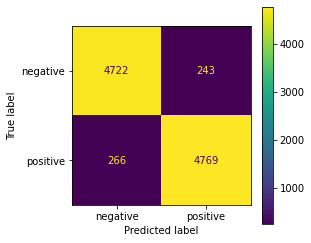

# **RNN Model**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense, LSTM, Embedding, Dropout, Bidirectional
from keras.optimizers import Adam, Optimizer
from keras.losses import binary_crossentropy
from keras.callbacks import ModelCheckpoint
from livelossplot import PlotLossesKeras
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

##With Preprocessing

### Building The Model



In [ ]:
max_tokens = 1000 #vocab size
max_len = 100
##Text Vectorization (Encoder)
# This layer processes the input string and turns it into a sequence of
# max_len integers, each of which maps to a certain token.
encoder = TextVectorization(
  # Max vocab size. Any words outside of the max_tokens most common ones
  # will be treated the same way: as "out of vocabulary" (OOV) tokens.
  max_tokens=max_tokens,
  # Output integer indices, one per string token
  output_mode="int",
  # Always pad or truncate to exactly this many tokens
  output_sequence_length=max_len,
)

In [ ]:
# Call adapt(), which fits the TextVectorization layer to our text dataset.
# This is when the max_tokens most common words (i.e. the vocabulary) are selected.
encoder.adapt(train_pre)

In [ ]:
#Sequential model is used here since all the layers in the model only have single input and produce single output.
RNN_model = Sequential()
RNN_model.add(Input(shape=(1,), dtype="string"))
#The first layer is the encoder, which converts the text to a sequence of token indices
RNN_model.add(encoder)
#This layer turns each integer (representing a token) from the previous layer
#An embedding layer stores one vector per word. When called,
#it converts the sequences of word indices to sequences of vectors.
#These vectors are trainable. After training (on enough data),
#words with similar meanings often have similar vectors.
#The embedding layer uses masking to handle the varying sequence-lengths. All the layers after the Embedding support masking:
# Note that we're using max_tokens + 1 here, since there's an
# out-of-vocabulary (OOV) token that gets added to the vocab.
RNN_model.add(Embedding((max_tokens + 1), 128))
#The RNN Layer processes sequence input by iterating through the elements.
#RNNs pass the outputs from one timestep to their input on the next timestep.
##The main advantage of a bidirectional RNN is that the signal from the beginning of the input doesn't need to be processed all the way through every timestep to affect the output.
##The main disadvantage of a bidirectional RNN is that you can't efficiently stream predictions as words are being added to the end.
RNN_model.add(Bidirectional(LSTM(64,  return_sequences=True)))
##optional part :
#RNN with return_sequences=True is that the output still has 3-axes, like the input, so it can be passed to another RNN layer, like this:
RNN_model.add(Bidirectional(LSTM(32)))
#After the RNN has converted the sequence to a single vector the dense layers do some final processing,
#and convert from this vector representation to a single logit as the classification output.
for i in [512,256,128,64]:
    RNN_model.add(Dense(i, activation='sigmoid', name="Dense_Layer_" + str(i)))
#then passing on a dense layer of size one to get data between 0 and 1
RNN_model.add(Dense(1, activation = 'sigmoid', name= 'Output'))

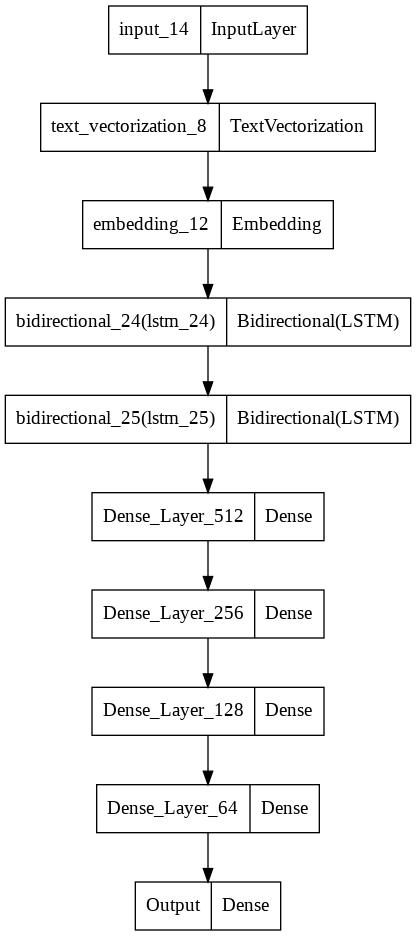

In [ ]:
tf.keras.utils.plot_model(RNN_model)

### Training

In [ ]:
save_weights = ModelCheckpoint(   # Saving Weights where validation accuracy is the best
    filepath='/content/drive/MyDrive/Text_checkpoints/RNN_pre/checkpoint',
    monitor='val_binary_accuracy',
    save_best_only=True,
    save_weights_only=True,
)

In [ ]:
epochs = 20
lr = 3e-5
RNN_model.compile(
    loss="binary_crossentropy",
    optimizer = optimizer(epochs,lr,train_pre), metrics=["binary_accuracy"])

In [ ]:
RNN_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_8 (TextV  (None, 100)              0         
 ectorization)                                                   
                                                                 
 embedding_12 (Embedding)    (None, 100, 128)          128128    
                                                                 
 bidirectional_24 (Bidirecti  (None, 100, 128)         98816     
 onal)                                                           
                                                                 
 bidirectional_25 (Bidirecti  (None, 64)               41216     
 onal)                                                           
                                                                 
 Dense_Layer_512 (Dense)     (None, 512)               33280     
                                                     

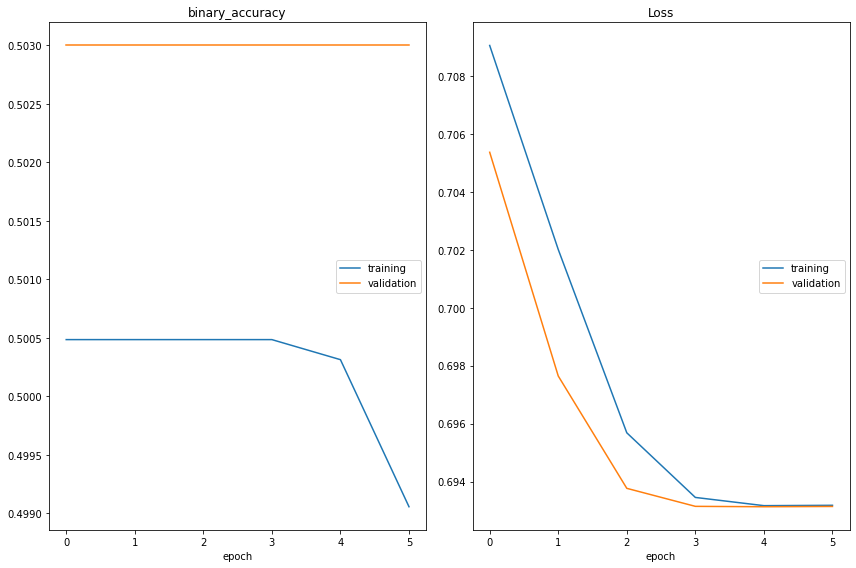

binary_accuracy
	training         	 (min:    0.499, max:    0.500, cur:    0.499)
	validation       	 (min:    0.503, max:    0.503, cur:    0.503)
Loss
	training         	 (min:    0.693, max:    0.709, cur:    0.693)
	validation       	 (min:    0.693, max:    0.705, cur:    0.693)
1094/1094 [==============================] - 25s 23ms/step - loss: 0.6932 - binary_accuracy: 0.4991 - val_loss: 0.6931 - val_binary_accuracy: 0.5030


In [ ]:
RNN_history = RNN_model.fit(train_pre,
                            train_labels_pre,
                            epochs=epochs,
                            batch_size=32,
                            verbose=1,
                            validation_split=0.125,
                            callbacks =[stop_early,PlotLossesKeras(),save_weights])

### Testing

In [ ]:
RNN_test_loss, RNN_test_acc = RNN_model.evaluate(test_pre, test_labels_pre)
print('Test Loss:', RNN_test_loss)
print('Test Accuracy:', RNN_test_acc)

313/313 [==============================] - 3s 11ms/step - loss: 0.7074 - binary_accuracy: 0.4968
Test Loss: 0.7073873281478882
Test Accuracy: 0.4968000054359436


In [ ]:
RNN_prediction = RNN_model.predict(test_pre)

313/313 [==============================] - 4s 10ms/step


### Evaluation Metrics

In [ ]:
y_preds_RNN = RNN_prediction.flatten()
y_preds_RNN = np.where(y_preds_RNN > 0.5, 1, 0)

F1 Score   -->  0.833
Accuracy   -->  0.837
Precision  -->  0.862
Specificty -->  0.805
Recall     -->  0.805
Confusion Matrix :
 [[4319  649]
 [ 980 4052]]


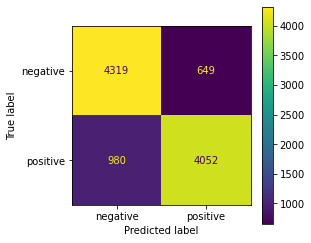

In [ ]:
Eval(test_labels_pre, y_preds_RNN)

## Without Preprocessing

### Building the Model

In [ ]:
max_tokens = 1000
max_len = 100
encoder_2 = TextVectorization(
  max_tokens=max_tokens,
  output_mode="int",
  output_sequence_length=max_len,
)
encoder_2.adapt(train_nrm)

In [ ]:
RNN_model_2 = Sequential()
RNN_model_2.add(Input(shape=(1,), dtype="string"))
RNN_model_2.add(encoder_2)
RNN_model_2.add(Embedding((max_tokens + 1), 128))
RNN_model_2.add(Bidirectional(LSTM(64,  return_sequences=True)))
RNN_model_2.add(Bidirectional(LSTM(32)))
for i in [512,256,128,64]:
    RNN_model_2.add(Dense(i, activation='sigmoid', name="Dense_Layer_" + str(i)))
RNN_model_2.add(Dense(1, activation = 'sigmoid', name= 'Output'))

### Training

In [ ]:
save_weights = ModelCheckpoint(   # Saving Weights where validation accuracy is the best
    filepath='/content/drive/MyDrive/Text_checkpoints/RNN_nrm/checkpoint',
    monitor='val_binary_accuracy',
    save_best_only=True,
    save_weights_only=True,
)

In [ ]:
epochs = 20
lr = 3e-3
RNN_model_2.compile(
    loss="binary_crossentropy", optimizer = optimizer(epochs,lr,train_nrm), metrics=["binary_accuracy"])

In [ ]:
RNN_model_2.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_12 (Text  (None, 100)              0         
 Vectorization)                                                  
                                                                 
 embedding_16 (Embedding)    (None, 100, 128)          128128    
                                                                 
 bidirectional_32 (Bidirecti  (None, 100, 128)         98816     
 onal)                                                           
                                                                 
 bidirectional_33 (Bidirecti  (None, 64)               41216     
 onal)                                                           
                                                                 
 Dense_Layer_512 (Dense)     (None, 512)               33280     
                                                     

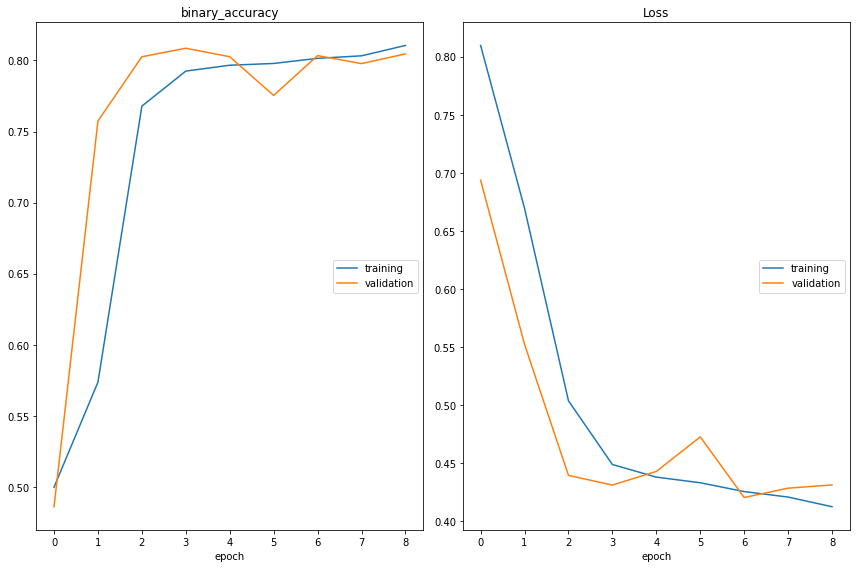

binary_accuracy
	training         	 (min:    0.500, max:    0.811, cur:    0.811)
	validation       	 (min:    0.486, max:    0.809, cur:    0.805)
Loss
	training         	 (min:    0.412, max:    0.810, cur:    0.412)
	validation       	 (min:    0.420, max:    0.694, cur:    0.431)
1094/1094 [==============================] - 25s 23ms/step - loss: 0.4123 - binary_accuracy: 0.8105 - val_loss: 0.4311 - val_binary_accuracy: 0.8046


In [ ]:
RNN_2_history = RNN_model_2.fit(train_nrm,
                                train_labels_nrm,
                                epochs=epochs,
                                batch_size=32,
                                verbose=1,
                                validation_split=0.125,
                                callbacks =[stop_early,PlotLossesKeras(),save_weights])

### Testing

In [ ]:
RNN_2_test_loss, RNN_2_test_acc = RNN_model_2.evaluate(test_pre, test_labels_pre)
print('Test Loss:', RNN_2_test_loss)
print('Test Accuracy:', RNN_2_test_acc)

313/313 [==============================] - 3s 11ms/step - loss: 0.4937 - binary_accuracy: 0.7911
Test Loss: 0.4936957061290741
Test Accuracy: 0.791100025177002


In [ ]:
RNN_2_prediction = RNN_model_2.predict(test_pre)

313/313 [==============================] - 4s 10ms/step


### Evaluation Metrics

In [ ]:
y_preds_RNN_2 = RNN_prediction.flatten()
y_preds_RNN_2 = np.where(y_preds_RNN > 0.5, 1, 0)

F1 Score   -->  0.487
Accuracy   -->  0.504
Precision  -->  0.501
Specificty -->  0.474
Recall     -->  0.474
Confusion Matrix :
 [[2685 2346]
 [2614 2355]]


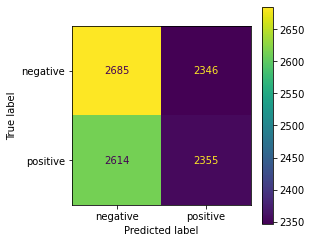

In [ ]:
Eval(test_labels_nrm, y_preds_RNN_2)